# Modelos usando tensorflow

Arrancamos por los imports

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 8 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [31]:
datos = "../../data/individual/resumen-comportamientos_Matilda_dataset_single_row.csv"
datos_por_minuto = "../../data/individual/resumen-comportamientos_Matilda_dataset_per_second.csv"

Comenzamos analizando los datos por fila simple, 3 variables de entrada. El analisis para los datos de fila 

In [32]:
data = pd.read_csv(datos)

In [33]:
data.describe()

x             y             z          ODBA
count  12400.000000  12400.000000  12400.000000  12400.000000
mean       0.211554      0.118672      0.755789      0.294454
std        0.377460      0.263951      0.299120      0.266990
min       -1.546900     -1.265600     -3.906300      0.003100
25%        0.000000     -0.031300      0.656300      0.100606
50%        0.125000      0.140600      0.875000      0.224550
75%        0.359400      0.296900      0.937500      0.404690
max        2.328100      1.250000      1.515600      7.951573

In [34]:
data.shape

(12400, 5)

In [35]:
data.columns

Index(['x', 'y', 'z', 'ODBA', 'Comportamiento'], dtype='object')

Text(0.5, 1.0, 'Comportamiento de Matilda')

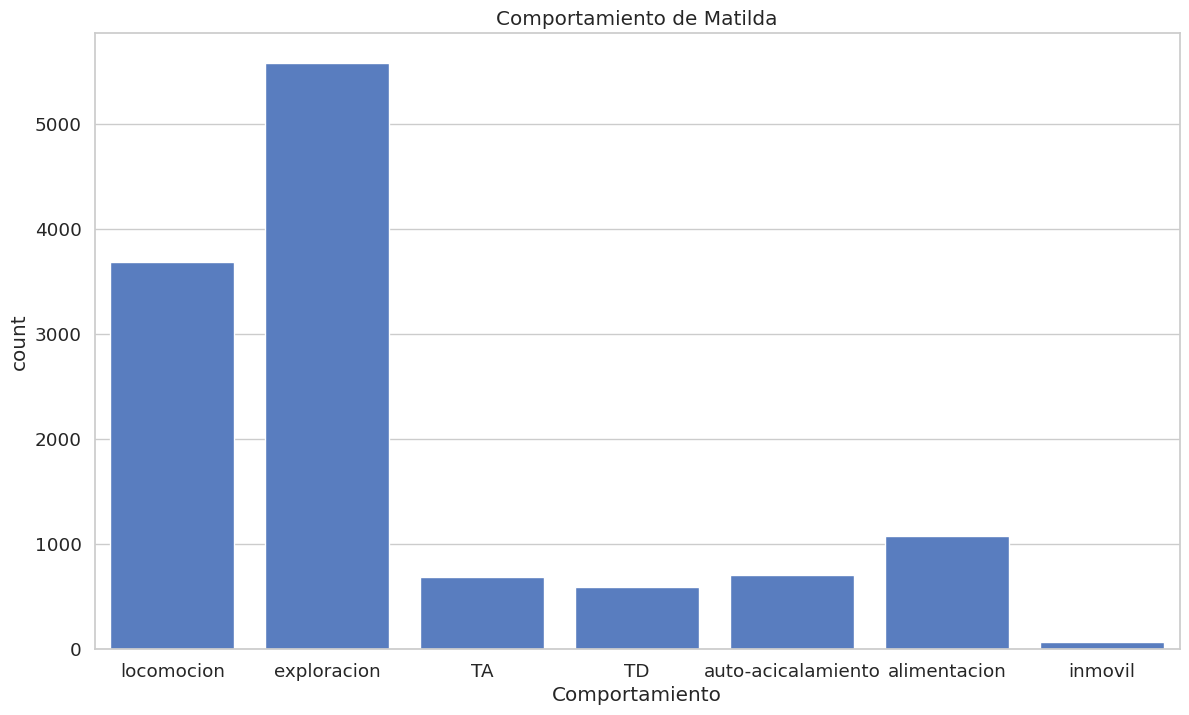

In [36]:
f = sns.countplot(x='Comportamiento', data=data)
f.set_title('Comportamiento de Matilda')

In [40]:
# Calculate z-scores for ODBA column
data['ODBA_zscore'] = (data['ODBA'] - data['ODBA'].mean()) / data['ODBA'].std()

# Define a threshold for z-score
threshold = 3

# Remove rows with ODBA z-score greater than the threshold
data = data[data['ODBA_zscore'] <= threshold]

# Remove the ODBA_zscore column
data = data.drop('ODBA_zscore', axis=1)


<Axes: xlabel='x', ylabel='ODBA'>

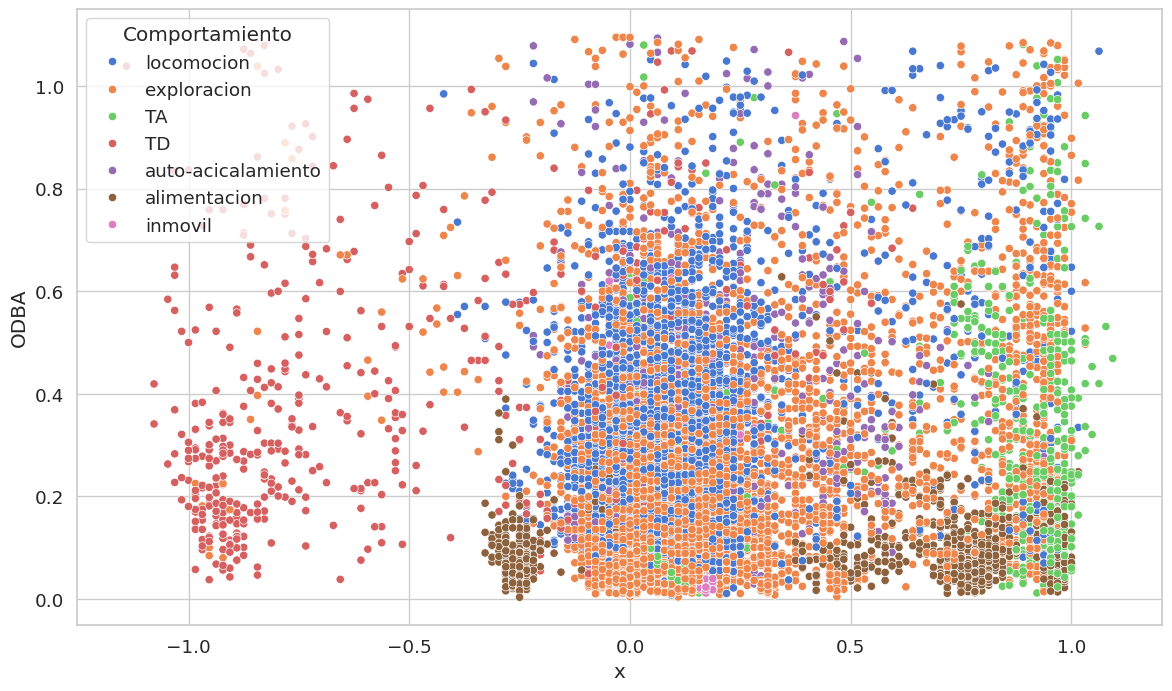

In [41]:
sns.scatterplot(x='x', y='ODBA', hue='Comportamiento', data=data, palette='muted')



<Axes: xlabel='y', ylabel='ODBA'>

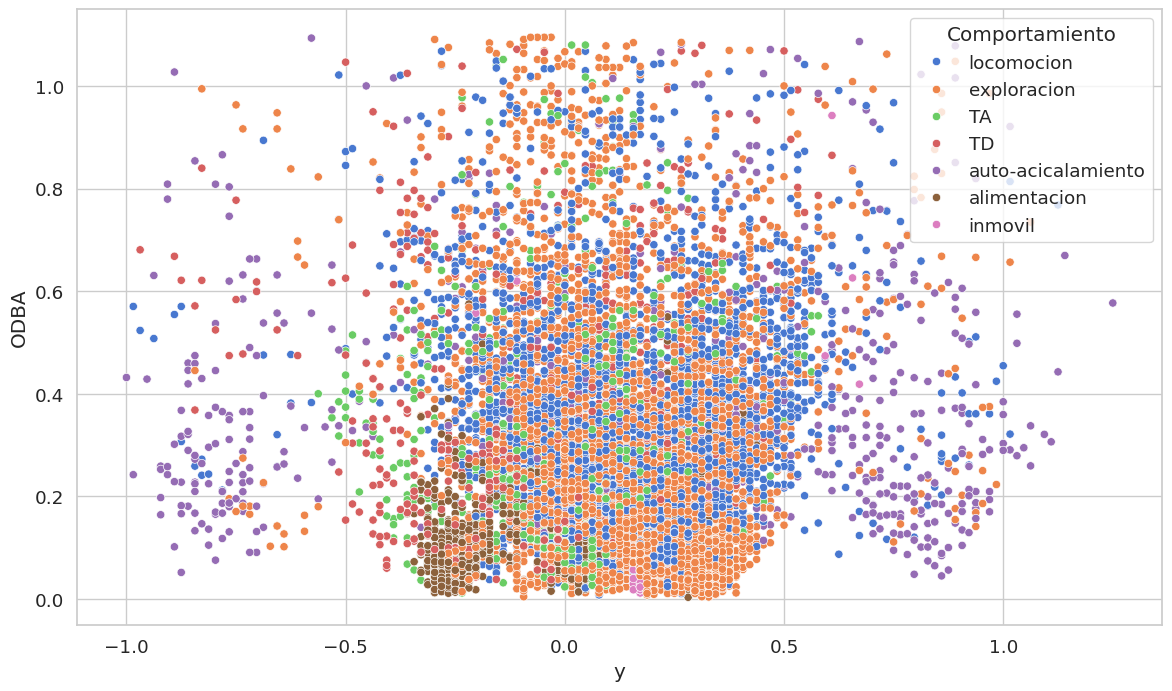

In [42]:
sns.scatterplot(x='y', y='ODBA', hue='Comportamiento', data=data, palette='muted')


<Axes: xlabel='z', ylabel='ODBA'>

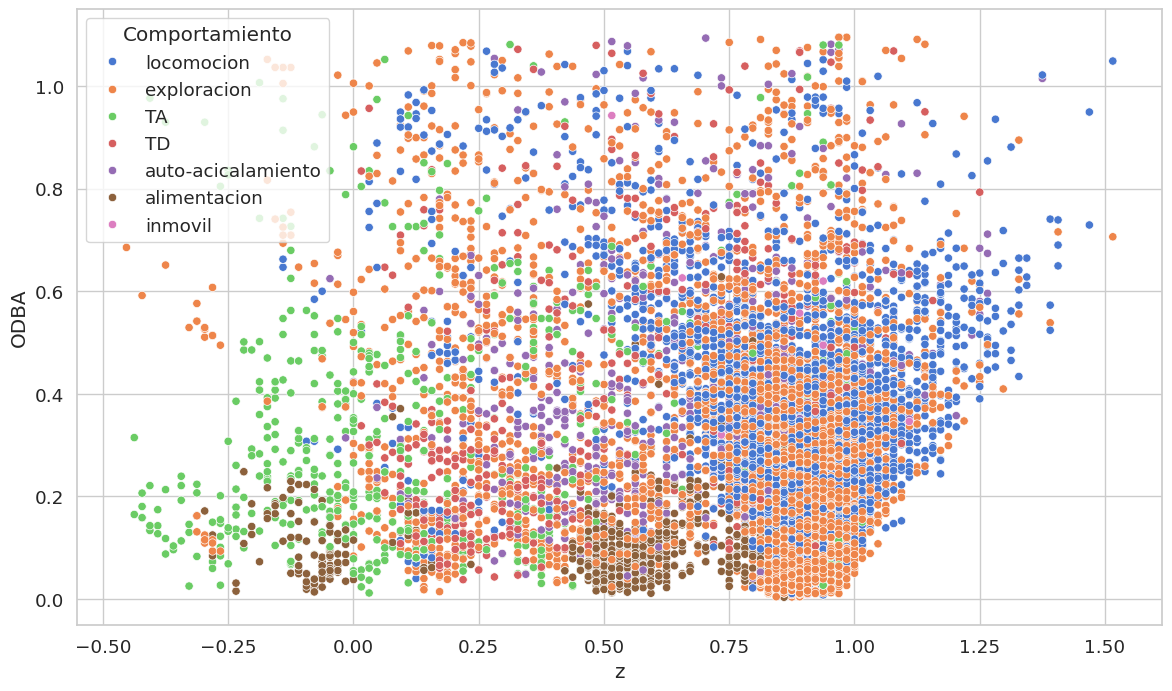

In [43]:
sns.scatterplot(x='z', y='ODBA', hue='Comportamiento', data=data, palette='muted')

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Create a new dataframe with the columns x, y, z, and ODBA
scaled_data = data[['x', 'y', 'z', 'ODBA']].copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Normalize the values in the new dataframe
scaled_data[['x', 'y', 'z', 'ODBA']] = scaler.fit_transform(scaled_data[['x', 'y', 'z', 'ODBA']])

# Add "Comportamiento" column to the scaled dataframe
scaled_data['Comportamiento'] = data['Comportamiento']

data.describe()

x             y             z          ODBA
count  12190.000000  12190.000000  12190.000000  12190.000000
mean       0.211228      0.120210      0.757939      0.277005
std        0.373648      0.262281      0.294094      0.224302
min       -1.140600     -1.000000     -0.453100      0.003100
25%        0.000000     -0.031300      0.656300      0.099404
50%        0.125000      0.140600      0.875000      0.219830
75%        0.359400      0.296900      0.937500      0.391178
max        1.093800      1.250000      1.515600      1.095410

<Axes: xlabel='x', ylabel='ODBA'>

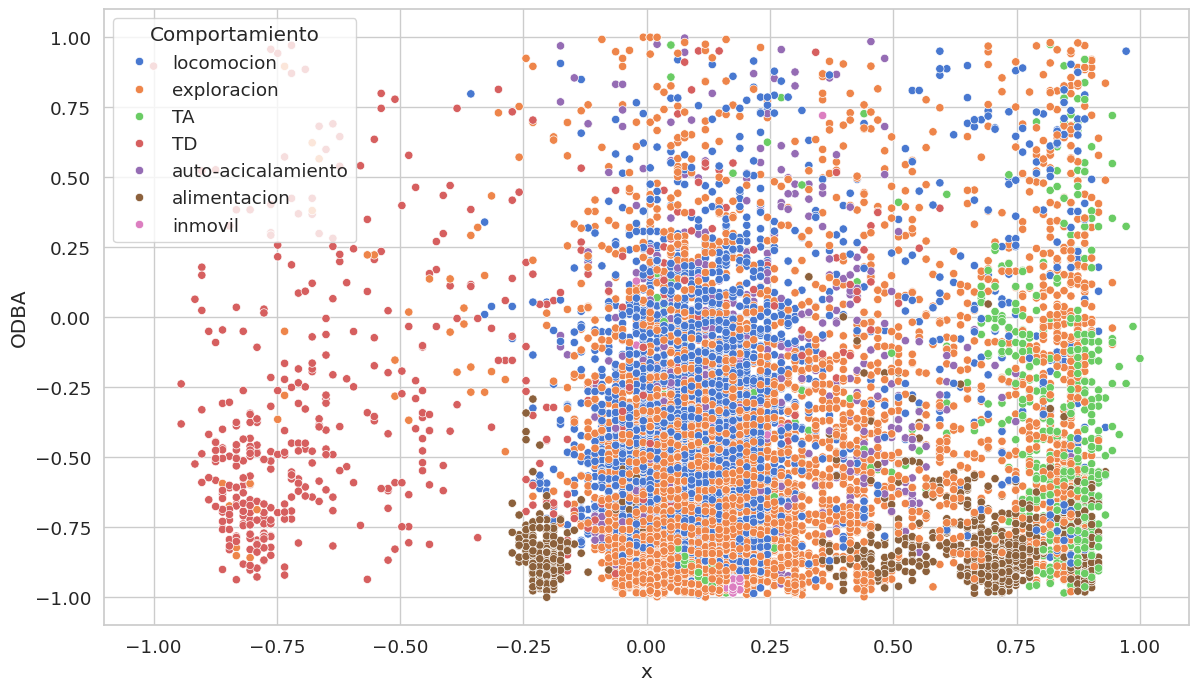

In [49]:
sns.scatterplot(x='x', y='ODBA', hue='Comportamiento', data=scaled_data, palette='muted')

<Axes: xlabel='y', ylabel='ODBA'>

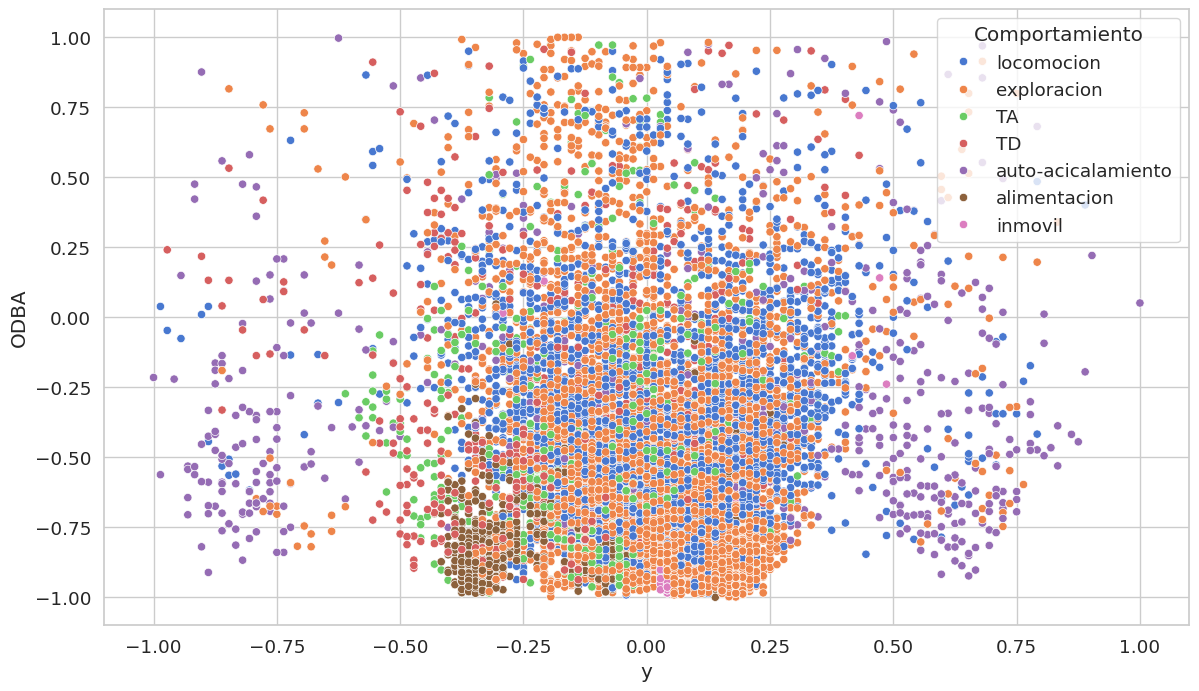

In [50]:
sns.scatterplot(x='y', y='ODBA', hue='Comportamiento', data=scaled_data, palette='muted')

<Axes: xlabel='z', ylabel='ODBA'>

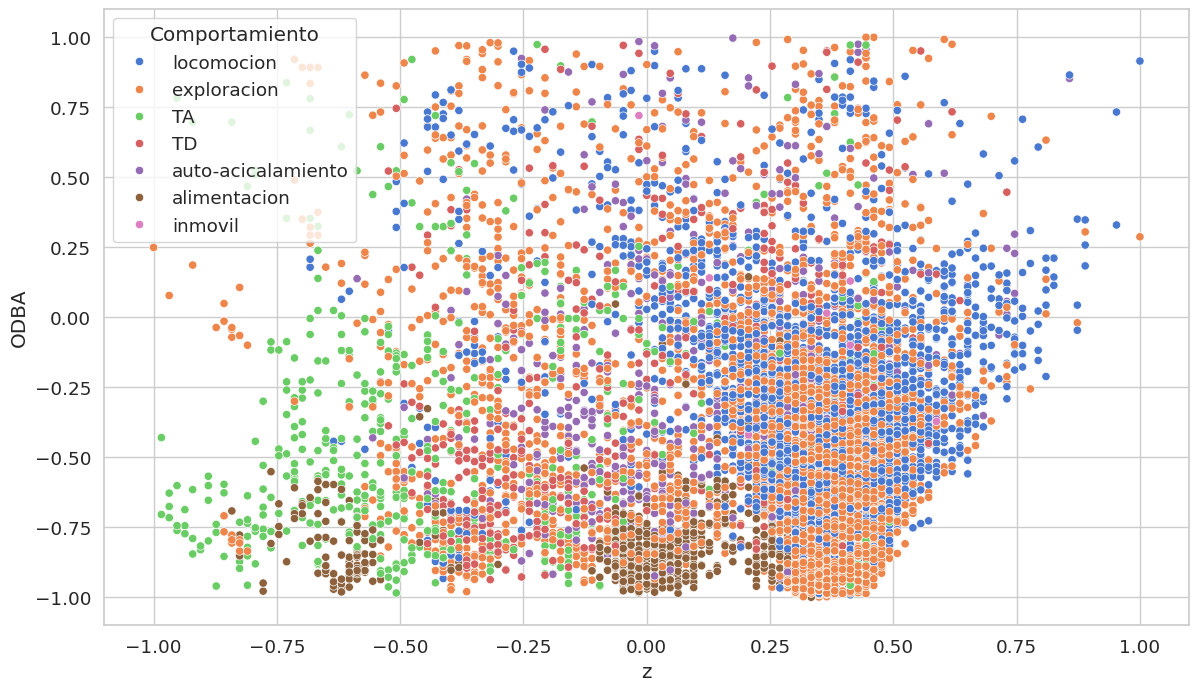

In [51]:
sns.scatterplot(x='z', y='ODBA', hue='Comportamiento', data=scaled_data, palette='muted')

In [53]:
# Create new model with 4 columns as input, "Comportamiento" as cathegorical output, and 1 hidden layer with half the number of outputs

model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(units=7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 5)                 25        
                                                                 
 dense_2 (Dense)             (None, 7)                 42        
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# Perform test-train split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

# Print the shapes of the train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Prepare training and validation data for model.fit()
X_train = train_data.drop(columns=['Comportamiento'])
y_train = train_data['Comportamiento']
X_test = test_data.drop(columns=['Comportamiento'])
y_test = test_data['Comportamiento']


Train data shape: (9752, 5)
Test data shape: (2438, 5)


In [72]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Convert the target variable to categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_encoded)

# Compile and fit the model with the one-hot encoded target variable
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=1, verbose=1, use_multiprocessing=True)


Epoch 1/100
9752/9752 [==============================] - 15s 1ms/step - loss: 0.9283 - accuracy: 0.6164
Epoch 2/100
9752/9752 [==============================] - 14s 1ms/step - loss: 0.9270 - accuracy: 0.6175
Epoch 3/100
 241/9752 [..............................] - ETA: 14s - loss: 0.9129 - accuracy: 0.6307

KeyboardInterrupt: 

In [63]:
# Save model with the name "model_" + the current timestamp as h5 file
model.save("model_" + str(int(time.time())) + ".h5")

In [65]:
from keras.utils import to_categorical
# Convert the target variable to one-hot encoded format
y_test_encoded = label_encoder.transform(y_test)
y_test_one_hot = to_categorical(y_test_encoded)

# Evaluate the model with the one-hot encoded target variable
model.evaluate(X_test, y_test_one_hot)


77/77 [==============================] - 0s 1ms/step - loss: 0.9155 - accuracy: 0.6161


[0.9154819846153259, 0.6160787343978882]

KeyError: 'val_acc'

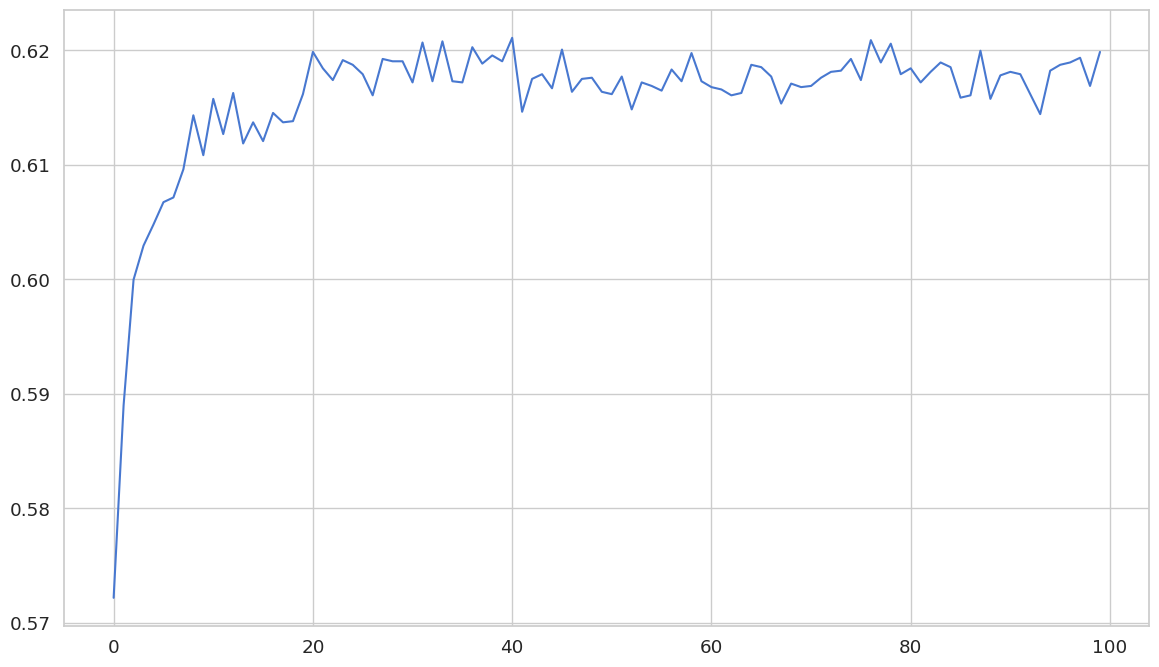

In [71]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

KeyError: 'val_loss'

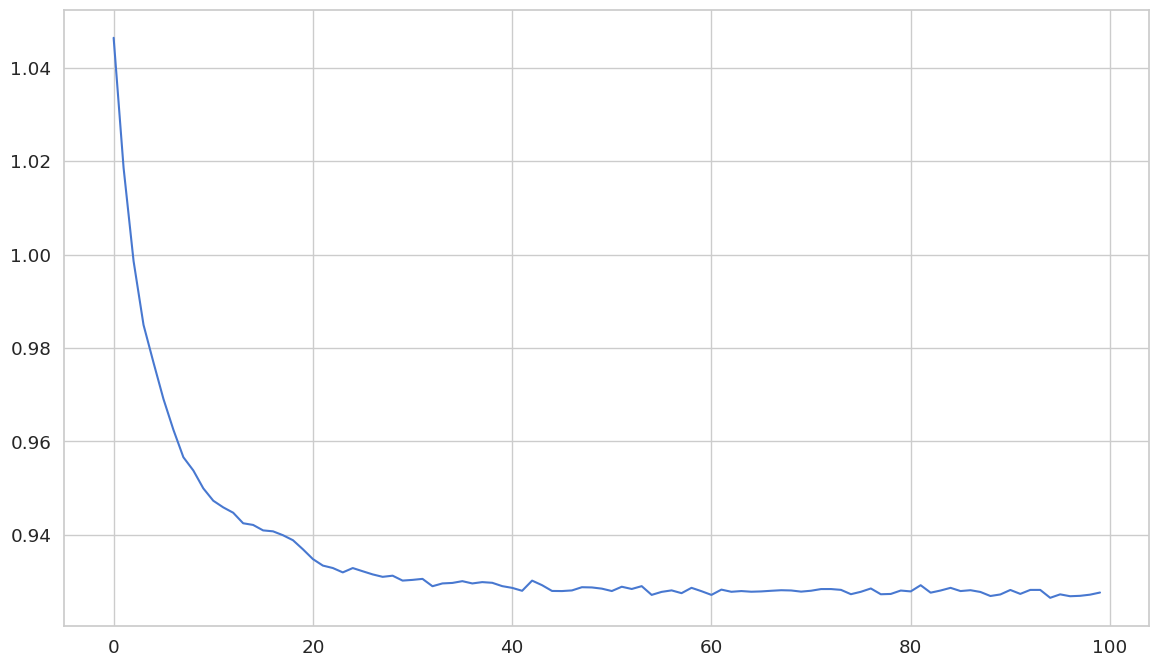

In [67]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
print(X_test.shape)
print(y_test.shape)

(2438, 4)
(2438,)


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
bin_predictions = tf.round(predictions).numpy().astype(int)
print(classification_report(y_test, bin_predictions))

77/77 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [78]:
y_test_single_label = np.argmax(y_test_one_hot, axis=1)
bin_predictions_single_label = np.argmax(bin_predictions, axis=1)
cfn_matrix = confusion_matrix(y_test_single_label, bin_predictions_single_label)
print(cfn_matrix)

[[ 72   0   6   0  46   0   4]
 [ 26  55   5   2   5   0   4]
 [ 37   0 169   0  12   0   2]
 [ 77   0   2  14  25   0  23]
 [241   6   4   1 704   0 167]
 [  3   0   0   0   6   0   0]
 [273   0   0   1 223   0 223]]


Text(0.5, 709.5555555555555, 'Comportamiento predicho')

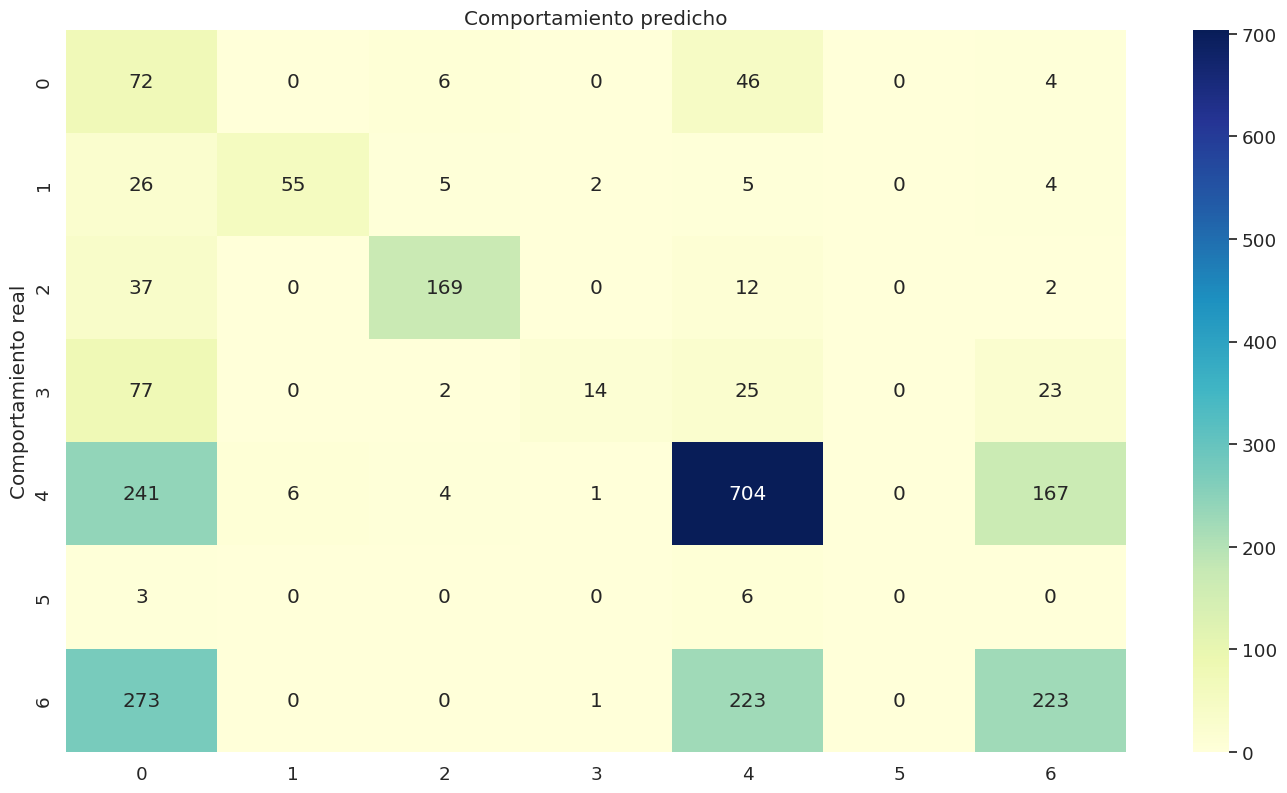

In [79]:
import matplotlib.pyplot as plt
class_names = data['Comportamiento'].unique()
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cfn_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Comportamiento real')
plt.xlabel('Comportamiento predicho')

Vemos que esta interpretacion base no se comporta del todo bien que digamos, un 60% de accuracy nada mas. Igual podemos ver que capaz un problema que no corregimos fue la desproporcionalidad de muestras de cada evento en la celda superior. Podriamos emparejar los numeros de muestra para ver que tan bien se comporta esta red base. 

## Lo mismo, pero con los 10 datos del ultimo segundo

